#### Reading Data

In [1]:
import numpy as np # for array operations and for mean absolute relative error
import pandas as pd # for working with DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('porocal.csv')
df.head()

,GR,NPHI,DT,DDLL,CAL,SP,PHIF
0,100.584839,9.717820,68.486836,10.088133,8.214933,152.518868,16.720
1,90.719633,10.742601,68.353292,8.850653,8.214862,153.070232,9.976
2,85.966671,11.569975,67.884402,8.250872,8.214865,151.473111,10.520
3,84.310091,12.136198,67.568475,8.087051,8.214863,150.235458,10.730
4,84.286258,12.447312,67.242100,8.162846,8.214900,149.627142,10.660


In [3]:
df.shape

(2500, 7)

In [4]:
X = df.drop('PHIF', axis = 1) # Features
y = df['PHIF']  # Target

#### Random Forest Regression Model

In [5]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn import metrics   

Data split for test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Data split for validation set

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [8]:
X_train.shape

(1600, 6)

In [9]:
y_train.shape

(1600,)

In [10]:
X_val.shape

(400, 6)

In [11]:
y_val.shape

(400,)

In [12]:
X_test.shape

(500, 6)

In [13]:
y_test.shape

(500,)

In [14]:
ada=AdaBoostRegressor(random_state=0)

In [15]:
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [16]:
y_train_pred = ada.predict(X_train)

In [17]:
y_val_pred = ada.predict(X_val)

In [18]:
y_test_pred = ada.predict(X_test)

#### Model Evaluation

##### Train Model

In [19]:
r2trn = r2_score(y_train, y_train_pred)
print("R2 of the Train Model =", r2trn)

R2 of the Train Model = 0.8491960126086575


In [20]:
msetrn = metrics.mean_squared_error(y_train, y_train_pred)
print("Mean Square Error of Train Model =", msetrn)

Mean Square Error of Train Model = 1.1602388544950335


In [21]:
rmsetrn = msetrn**0.5
print("RMSE of the Train Model =", rmsetrn)

RMSE of the Train Model = 1.0771438411349867


In [22]:
maetrn = metrics.mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error of Train Model =", maetrn)

Mean Absolute Error of Train Model = 0.8374559151942819


##### Validation Model

In [23]:
r2val = r2_score(y_val, y_val_pred)
print("R2 of the Validation Model =", r2val)

R2 of the Validation Model = 0.812387070746909


In [24]:
mseval = metrics.mean_squared_error(y_val, y_val_pred)
print("Mean Square Error of Validation Model =", mseval)

Mean Square Error of Validation Model = 1.3549481298210453


In [25]:
rmseval = msetrn**0.5
print("RMSE of the Validation Model =", rmseval)

RMSE of the Validation Model = 1.0771438411349867


In [26]:
maeval = metrics.mean_absolute_error(y_val, y_val_pred)
print("Mean Absolute Error of Validation Model =", maeval)

Mean Absolute Error of Validation Model = 0.9044150431458883


##### Test Model

In [27]:
r2tst = r2_score(y_test, y_test_pred)
print("R2 of the Test Model =", r2tst)

R2 of the Test Model = 0.8129240298402682


In [28]:
msetst = metrics.mean_squared_error(y_test, y_test_pred)
print("Mean Square Error of Test Model =", msetst)

Mean Square Error of Test Model = 1.3193753071663108


In [29]:
rmsetst = msetst**0.5
print("RMSE of the Test Model =", rmsetst)

RMSE of the Test Model = 1.1486406344746432


In [30]:
maetst = metrics.mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error of Test Model =", maetst)

Mean Absolute Error of Test Model = 0.8647685239512208


In [31]:
theta = np.polyfit(y_test, y_test_pred, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * y_test #best fit line

The parameters of the line: [0.7713206  2.74101926]


##### Plots

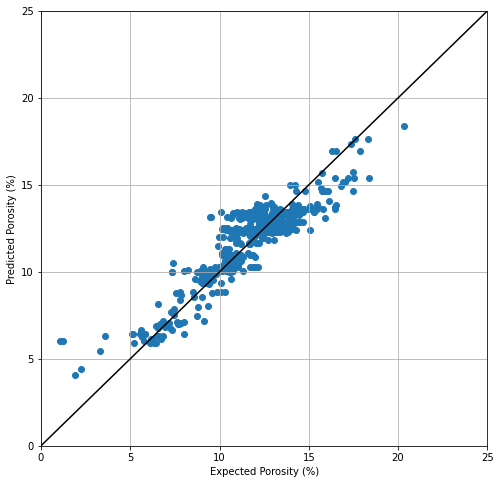

In [32]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Expected Porosity (%)')
plt.ylabel('Predicted Porosity (%)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.plot([0,25], [0,25], 'black')
plt.grid()

Text(0.5, 1.0, 'Feature Importance (MDI)')

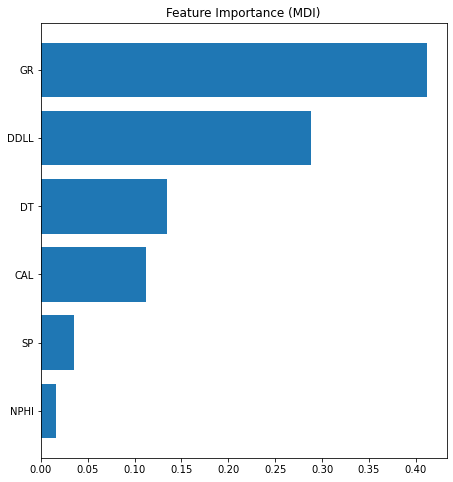

In [33]:
fig = plt.figure(figsize=(16, 8))
feature_importance = ada.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['GR', 'NPHI', 'DT', 'DDLL', 'CAL', 'SP'])[sorted_idx])
plt.title('Feature Importance (MDI)', fontsize=12)

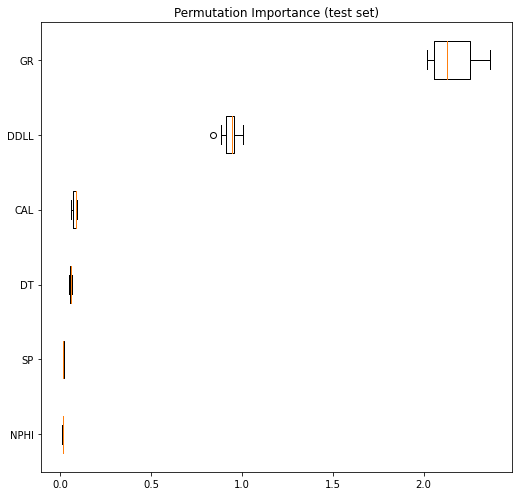

In [34]:
fig = plt.figure(figsize=(14, 7))
result = permutation_importance(
    ada, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(['GR', 'NPHI', 'DT', 'DDLL', 'CAL', 'SP'])[sorted_idx]
)
plt.title('Permutation Importance (test set)', fontsize=12)
fig.tight_layout()
plt.show()